In [3]:
import numpy as np

# Generate a random dataset with 50 samples and 2 features
np.random.seed(0)
X = np.random.randn(50, 2)

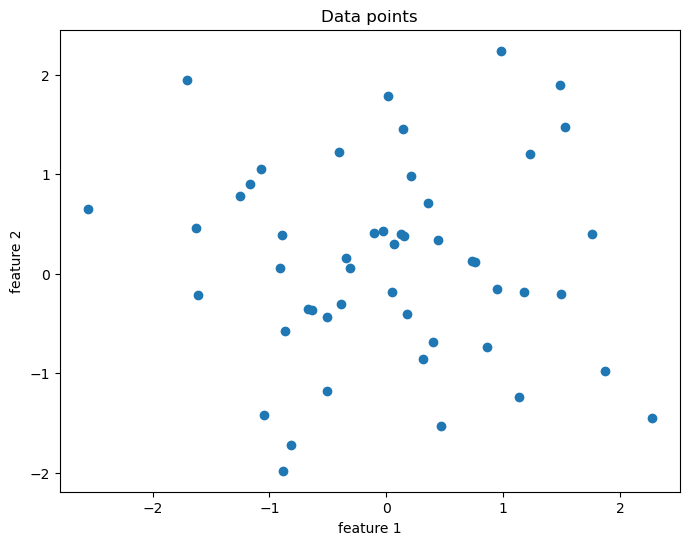

In [4]:
import matplotlib.pyplot as plt

def plot_data(X):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    # put a caption on the plot
    plt.title('Data points')
    # label the x-axis
    plt.xlabel('feature 1')
    # label the y-axis
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    # Plot the data points and their assigned labels
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()


plot_data(X)

[2 1 2 2 1 1 2 1 2 2 0 2 2 2 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 2 0 0 2 2
 2 0 0 0 2 1 2 1 1 1 1 1 1]


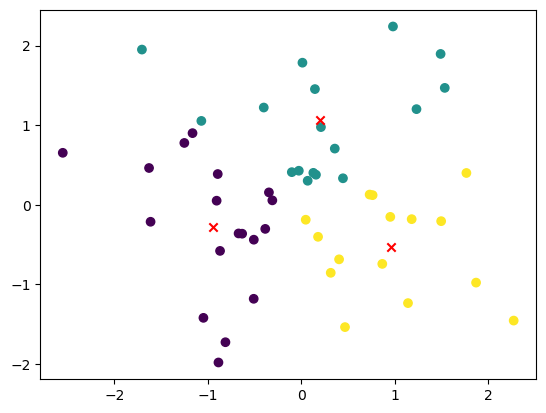

In [5]:
from scipy.cluster.vq import kmeans, vq

# Specify the number of clusters
k = 3

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0]


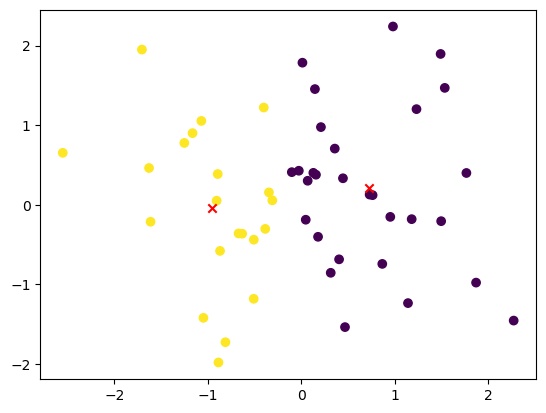

In [6]:
# Specify the number of clusters
k = 2

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)


In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate the clustering results using the Silhouette score
silhouette_score = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette_score:.2f}')

# Evaluate the clustering results using the Calinski-Harabasz index
calinski_harabasz_score = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz index: {calinski_harabasz_score:.2f}')


Silhouette score: 0.31
Calinski-Harabasz index: 25.77


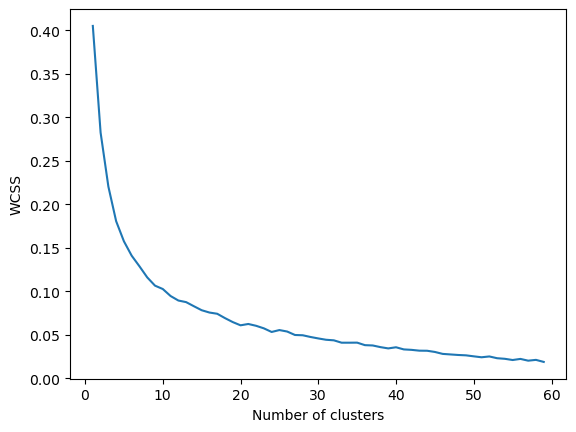

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Generate a random dataset
np.random.seed(62)
X = np.random.rand(100, 2)

# Compute the WCSS for different numbers of clusters
wcss = []
for k in range(1, 60):
    centroids, distortion = kmeans(X, k)
    wcss.append(distortion)

# Plot the WCSS vs. the number of clusters
plt.plot(range(1, 60), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


[1 2 2 2 0 2 2 2 0 1 0 2 2 1 1 1 2 1 0 2 2 1 1 0 0 1 0 0 2 2 1 1 2 2 1 2 2
 0 1 0 0 0 2 2 0 2 2 0 2 1 0 2 2 0 1 2 0 2 0 2 1 1 0 1 0 2 0 2 2 1 0 0 2 2
 0 1 1 0 1 0 1 1 0 2 0 2 0 2 0 2 1 0 1 2 2 2 0 0 0 1]


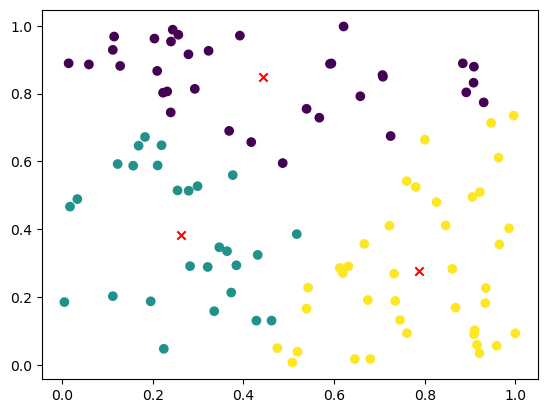

In [9]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_basic(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids

labels, centroids = kmeans_basic(X, k=3)
print(labels)

plot_data_clusters(X, labels, centroids)

In [10]:
from scipy.spatial.distance import cdist

def mean_distance_similarity(X, labels):
    # Compute the mean distance between elements in each cluster
    distances = cdist(X, X)
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)
    
    # Normalize the similarity by the number of clusters
    similarity /= len(np.unique(labels))
    
    return similarity

# Compute the mean distance similarity
mean_distance_similarity = mean_distance_similarity(X, labels)
print(f'Mean distance similarity: {mean_distance_similarity:.2f}')



Mean distance similarity: 0.32


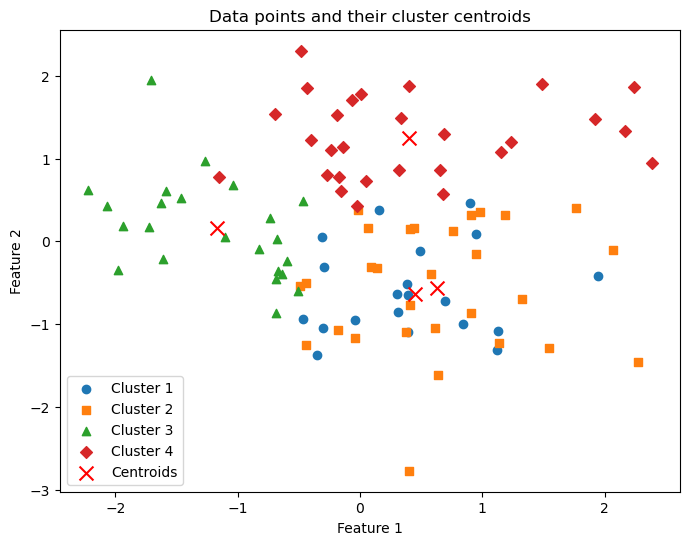

In [15]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

# Generate a random dataset with 100 samples and 3 features
np.random.seed(0)
X = np.random.randn(100, 3)

# Specify the number of clusters
k = 4

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

def plot_data(X):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    # put a caption on the plot
    plt.title('Data points')
    # label the x-axis
    plt.xlabel('feature 1')
    # label the y-axis
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids, markers=None):
    # If no markers are provided, use default marker
    if markers is None:
        markers = ['o'] * len(centroids)

    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        # Select data points in the current cluster
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=markers[i], label=f'Cluster {i+1}')
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
    plt.legend()
    plt.title('Data points and their cluster centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Define custom markers for each cluster
markers = ['o', 's', '^', 'D']  # Circle, square, triangle, diamond

# Plot the data clusters with custom markers
plot_data_clusters(X, labels, centroids, markers)


In [17]:
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Generate a random dataset with 100 samples and 3 features
np.random.seed(0)
X = np.random.randn(100, 3)

# Specify the number of clusters
k = 4

# Function to perform k-means clustering with Manhattan distance
def kmeans_manhattan(X, k, max_iter=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iter):
        distances = cdist(X, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Perform k-means clustering with Manhattan distance
centroids_manhattan, labels_manhattan = kmeans_manhattan(X, k)

# Perform k-means clustering with Euclidean distance using scipy
centroids_euclidean, _ = kmeans(X, k)
distances_euclidean = cdist(X, centroids_euclidean, metric='euclidean')
labels_euclidean = np.argmin(distances_euclidean, axis=1)

# Compare clustering performance using Silhouette score and Calinski-Harabasz index
silhouette_manhattan = silhouette_score(X, labels_manhattan, metric='manhattan')
silhouette_euclidean = silhouette_score(X, labels_euclidean, metric='euclidean')

calinski_manhattan = calinski_harabasz_score(X, labels_manhattan)
calinski_euclidean = calinski_harabasz_score(X, labels_euclidean)

print(f"Silhouette Score (Manhattan): {silhouette_manhattan}")
print(f"Silhouette Score (Euclidean): {silhouette_euclidean}")
print(f"Calinski-Harabasz Index (Manhattan): {calinski_manhattan}")
print(f"Calinski-Harabasz Index (Euclidean): {calinski_euclidean}")




Silhouette Score (Manhattan): 0.2587376368679881
Silhouette Score (Euclidean): 0.2595026517591621
Calinski-Harabasz Index (Manhattan): 34.47411702020396
Calinski-Harabasz Index (Euclidean): 37.497879309686034


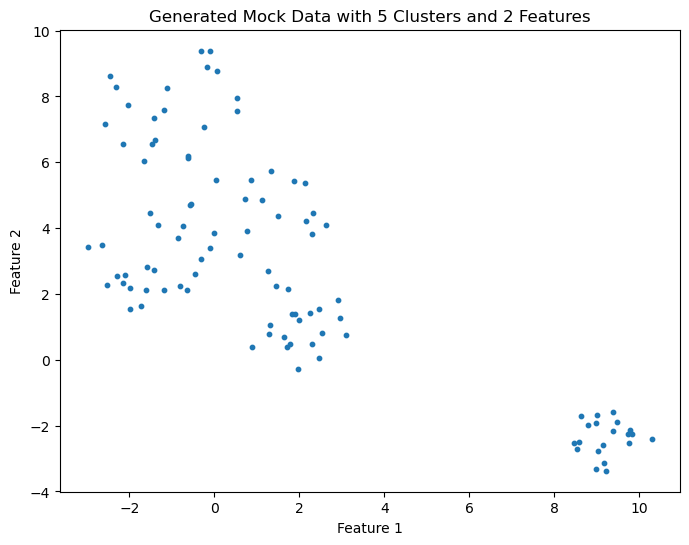

D:\Anaconda\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

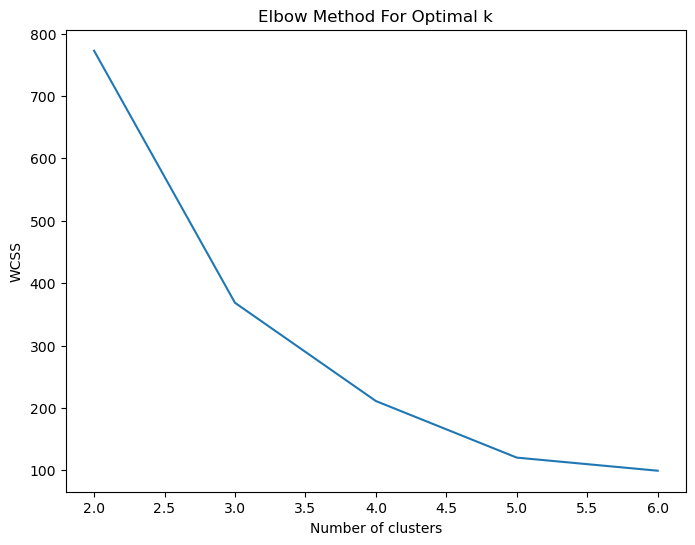

In [28]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random centroids for 5 clusters
centroids = np.random.uniform(low=-10, high=10, size=(5, 2))

# Generate random radii for each cluster such that circles are disjoint
radii = np.random.uniform(low=1, high=2, size=5)

# Function to generate points within a circle
def generate_points(centroid, radius, num_points=20):
    points = []
    for _ in range(num_points):
        r = radius * np.sqrt(np.random.rand())
        theta = np.random.rand() * 2 * np.pi
        x = centroid[0] + r * np.cos(theta)
        y = centroid[1] + r * np.sin(theta)
        points.append([x, y])
    return np.array(points)

# Generate points for all clusters
X = np.vstack([generate_points(centroid, radius) for centroid, radius in zip(centroids, radii)])

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Generated Mock Data with 5 Clusters and 2 Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Compute the WCSS for different numbers of clusters
wcss = []
k_values = [2, 3, 4, 5, 6]  # Testing k from 2 to 6
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs. the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


D:\Anaconda\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.55
Calinski-Harabasz Index: 561.63


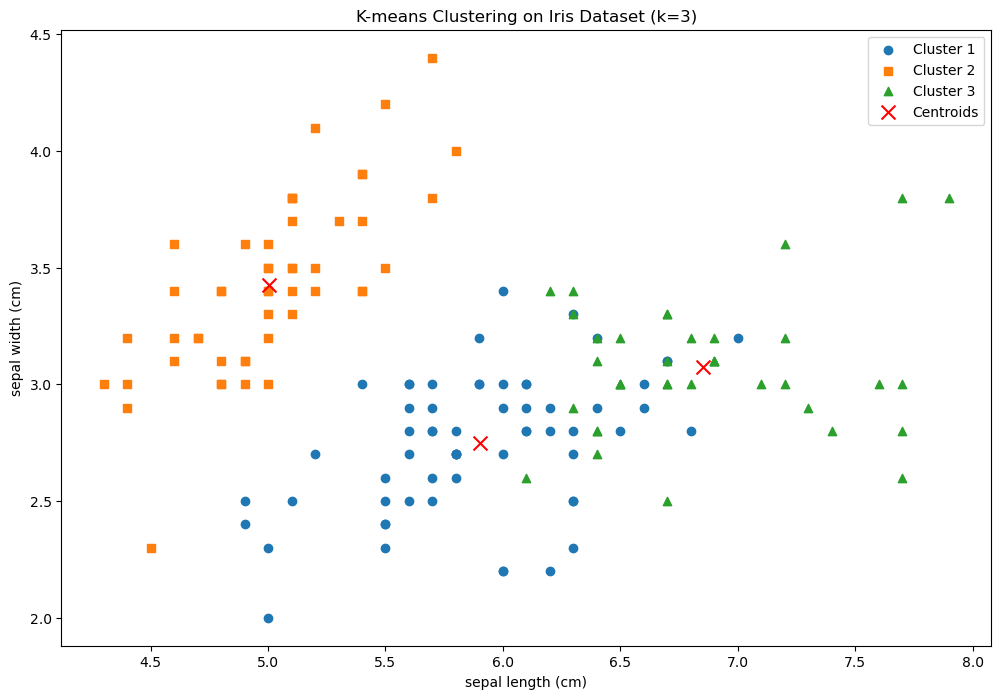

In [30]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load the iris dataset
iris = load_iris()
X = iris.data

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.2f}')

# Define marker styles for the clusters
markers = ['o', 's', '^']

# Plot the clustering results
plt.figure(figsize=(12, 8))

# We will use the first two features for visualization
for i in range(3):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=markers[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering on Iris Dataset (k=3)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()
